Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.stats import levene
import seaborn as sns
import openpyxl
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro

In [ ]:
# Load the dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INF2178_A3_data.csv")
print(df.head())

   fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
0             36.58          39.54                     33.822   
1             50.82          44.44                     38.147   
2             40.68          28.57                     28.108   
3             32.57          23.57                     15.404   
4             31.98          19.65                     18.727   

   springreadingscore  springmathscore  springgeneralknowledgescore  \
0               49.37            50.10                       40.533   
1               83.50            58.93                       37.409   
2               40.41            32.81                       29.312   
3               34.14            35.25                       27.382   
4               32.84            23.60                       26.977   

   totalhouseholdincome  incomeinthousands  incomegroup  
0              140000.0              140.0            3  
1              120000.0              120.0            3  
2       

In [ ]:
# Calculate growth in scores from fall to spring for each subject
df['reading_growth'] = df['springreadingscore'] - df['fallreadingscore']
df['math_growth'] = df['springmathscore'] - df['fallmathscore']
df['general_knowledge_growth'] = df['springgeneralknowledgescore'] - df['fallgeneralknowledgescore']

# Check the prepared data
print(df[['reading_growth', 'math_growth', 'general_knowledge_growth']].head())

   reading_growth  math_growth  general_knowledge_growth
0           12.79        10.56                     6.711
1           32.68        14.49                    -0.738
2           -0.27         4.24                     1.204
3            1.57        11.68                    11.978
4            0.86         3.95                     8.250


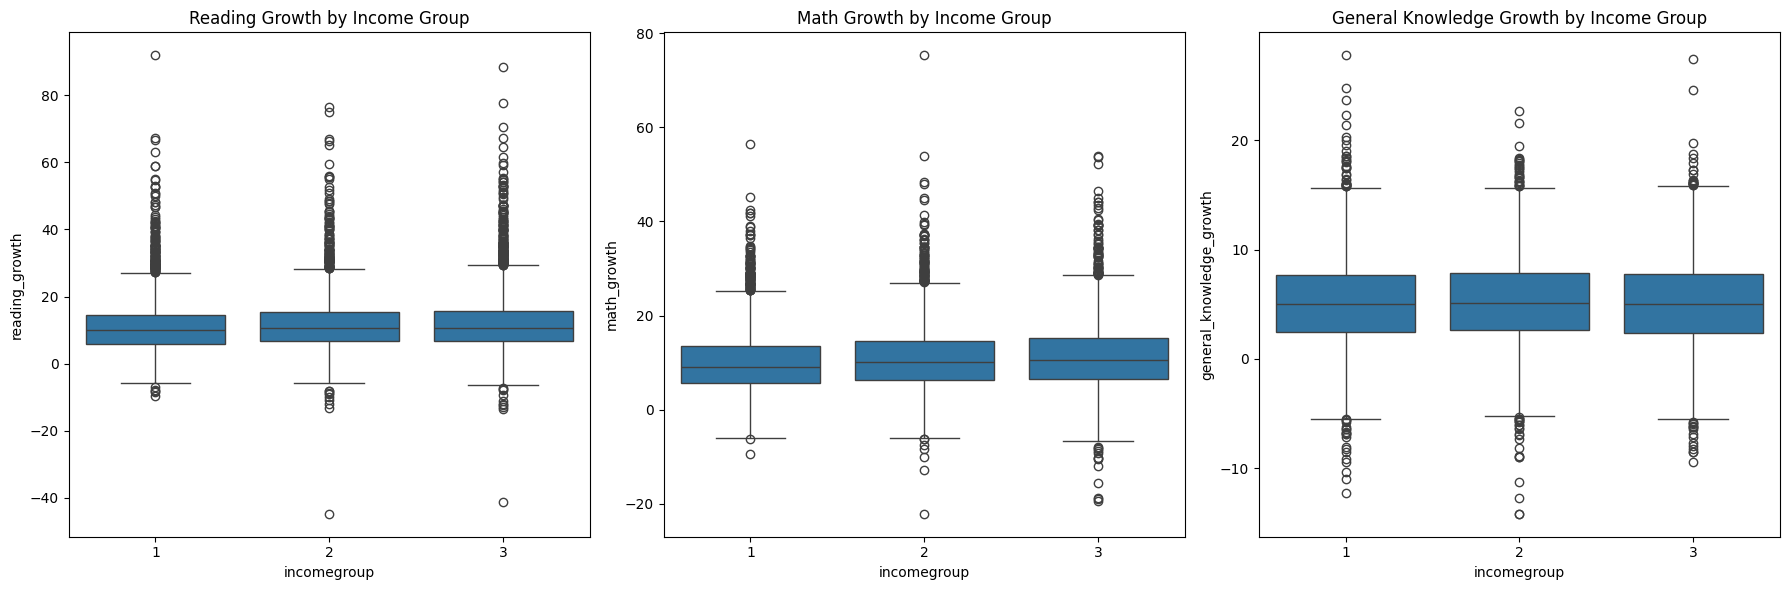

In [ ]:
# Visualize the distribution of growth scores for each income group
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='incomegroup', y='reading_growth', data=df)
plt.title('Reading Growth by Income Group')

plt.subplot(1, 3, 2)
sns.boxplot(x='incomegroup', y='math_growth', data=df)
plt.title('Math Growth by Income Group')

plt.subplot(1, 3, 3)
sns.boxplot(x='incomegroup', y='general_knowledge_growth', data=df)
plt.title('General Knowledge Growth by Income Group')

plt.tight_layout()
plt.show()

<Axes: xlabel='reading_growth', ylabel='Count'>

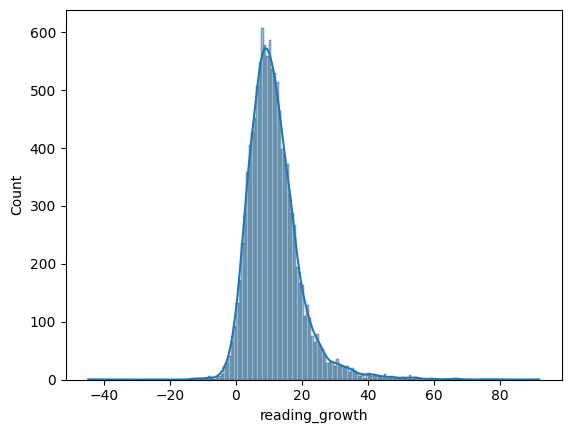

In [ ]:
# Visual inspection of the distribution of growth scores
sns.histplot(df['reading_growth'], kde=True)

In [ ]:
# Test for homogeneity of variances among reading growth scores
stat, p = levene(df[df['incomegroup'] == 1]['reading_growth'],
                 df[df['incomegroup'] == 2]['reading_growth'],
                 df[df['incomegroup'] == 3]['reading_growth'])
print('Levene’s test for reading growth: Stat=%.3f, p=%.3f' % (stat, p))

Levene’s test for reading growth: Stat=19.728, p=0.000


In [ ]:
# Test for homogeneity of variances among math growth scores
stat, p = levene(df[df['incomegroup'] == 1]['math_growth'],
                 df[df['incomegroup'] == 2]['math_growth'],
                 df[df['incomegroup'] == 3]['math_growth'])
print('Levene’s test for math growth: Stat=%.3f, p=%.3f' % (stat, p))

Levene’s test for math growth: Stat=22.215, p=0.000


In [ ]:
# Test for homogeneity of variances among general knowledge growth scores
stat, p = levene(df[df['incomegroup'] == 1]['general_knowledge_growth'],
                 df[df['incomegroup'] == 2]['general_knowledge_growth'],
                 df[df['incomegroup'] == 3]['general_knowledge_growth'])
print('Levene’s test for general knowledge growth: Stat=%.3f, p=%.3f' % (stat, p))

Levene’s test for general knowledge growth: Stat=0.043, p=0.958


In [ ]:
# Fit the ANCOVA for reading growth
model_reading = ols('reading_growth ~ C(incomegroup) + fallreadingscore', data=df).fit()

In [ ]:
# Print the summary of the ANCOVA model for reading growth
print(model_reading.summary())

                            OLS Regression Results                            
Dep. Variable:         reading_growth   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     133.5
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           4.50e-85
Time:                        00:41:10   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11929   BIC:                         8.339e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5430    

In [ ]:
# Shapiro-Wilk test on residuals of the reading growth model
stat, p = shapiro(model_reading.resid)
print(f'Shapiro-Wilk Test for Reading Growth Residuals: Stat={stat}, p-value={p}')

Shapiro-Wilk Test for Reading Growth Residuals: Stat=0.9119972586631775, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Fit the ANCOVA for math growth
model_math = ols('math_growth ~ C(incomegroup) + fallmathscore', data=df).fit()

In [ ]:
# Print the summary of the ANCOVA model for math growth
print(model_math.summary())

                            OLS Regression Results                            
Dep. Variable:            math_growth   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     66.62
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           1.02e-42
Time:                        00:54:31   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.2011    

In [ ]:
# Shapiro-Wilk test on residuals of the math growth model
stat, p = shapiro(model_math.resid)
print(f'Shapiro-Wilk Test for Math Reading Growth Residuals: Stat={stat}, p-value={p}')

Shapiro-Wilk Test for Math Reading Growth Residuals: Stat=0.9649319052696228, p-value=0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Fit the ANCOVA for general knowledge growth
model_general_knowledge = ols('general_knowledge_growth ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()

In [ ]:
# Print the summary of the ANCOVA model for general knowledge growth
print(model_general_knowledge.summary())

                               OLS Regression Results                               
Dep. Variable:     general_knowledge_growth   R-squared:                       0.061
Model:                                  OLS   Adj. R-squared:                  0.061
Method:                       Least Squares   F-statistic:                     260.2
Date:                      Sat, 23 Mar 2024   Prob (F-statistic):          1.43e-163
Time:                              01:09:23   Log-Likelihood:                -33259.
No. Observations:                     11933   AIC:                         6.653e+04
Df Residuals:                         11929   BIC:                         6.656e+04
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [ ]:
# Shapiro-Wilk test on residuals of the general knowledge growth model
stat, p = shapiro(model_general_knowledge.resid)
print(f'Shapiro-Wilk Test for general knowledge growth Residuals: Stat={stat}, p-value={p}')

Shapiro-Wilk Test for general knowledge growth Residuals: Stat=0.9980394840240479, p-value=3.155014791089705e-11


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Text(0.5, 1.0, 'Reading Growth by Income Group')

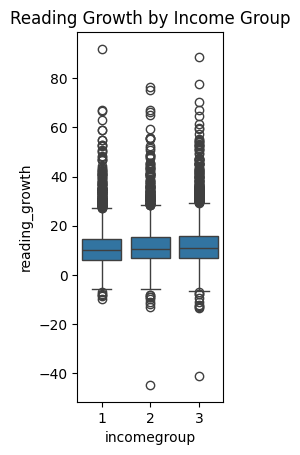

In [ ]:
# Boxplot for Reading Growth by Income Group
plt.subplot(1, 3, 1)
sns.boxplot(x='incomegroup', y='reading_growth', data=df)
plt.title('Reading Growth by Income Group')


In [ ]:
# Reshape the data
melted_df = pd.melt(df, id_vars=['incomegroup'], value_vars=['reading_growth', 'math_growth', 'general_knowledge_growth'],
                    var_name='Score Category', value_name='Growth Score')

# Convert 'incomegroup' to a string to improve plot aesthetics
melted_df['incomegroup'] = melted_df['incomegroup'].astype(str)

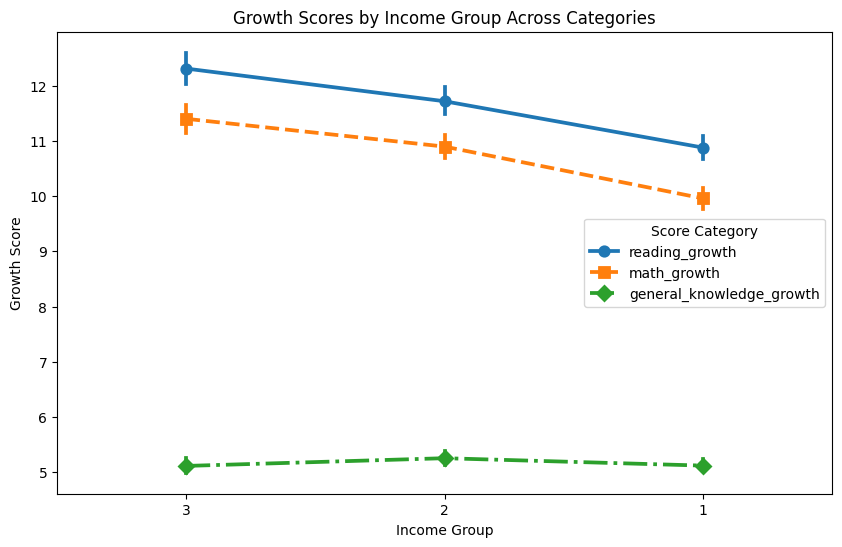

In [ ]:
# Create a combined line plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=melted_df, x='incomegroup', y='Growth Score', hue='Score Category', markers=['o', 's', 'D'], linestyles=['-', '--', '-.'])

plt.title('Growth Scores by Income Group Across Categories')
plt.xlabel('Income Group')
plt.ylabel('Growth Score')
plt.legend(title='Score Category')

plt.show()

In [ ]:
# Create a combined growth score
df['combined_growth_score'] = (df['reading_growth'] + df['math_growth'] + df['general_knowledge_growth']) / 3

# Create a combined initial score
df['combined_initial_score'] = (df['fallreadingscore'] + df['fallmathscore'] + df['fallgeneralknowledgescore']) / 3

In [ ]:
# ANCOVA with the combined scores
model = ols('combined_growth_score ~ C(incomegroup) + combined_initial_score', data=df).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     combined_growth_score   R-squared:                       0.046
Model:                               OLS   Adj. R-squared:                  0.045
Method:                    Least Squares   F-statistic:                     189.9
Date:                   Sat, 23 Mar 2024   Prob (F-statistic):          2.59e-120
Time:                           02:16:09   Log-Likelihood:                -34485.
No. Observations:                  11933   AIC:                         6.898e+04
Df Residuals:                      11929   BIC:                         6.901e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

<ipython-input-61-b0bf5a1ad9e6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='incomegroup', y='combined_growth_score', ci='sd', markers='o', linestyles='-', dodge=True)


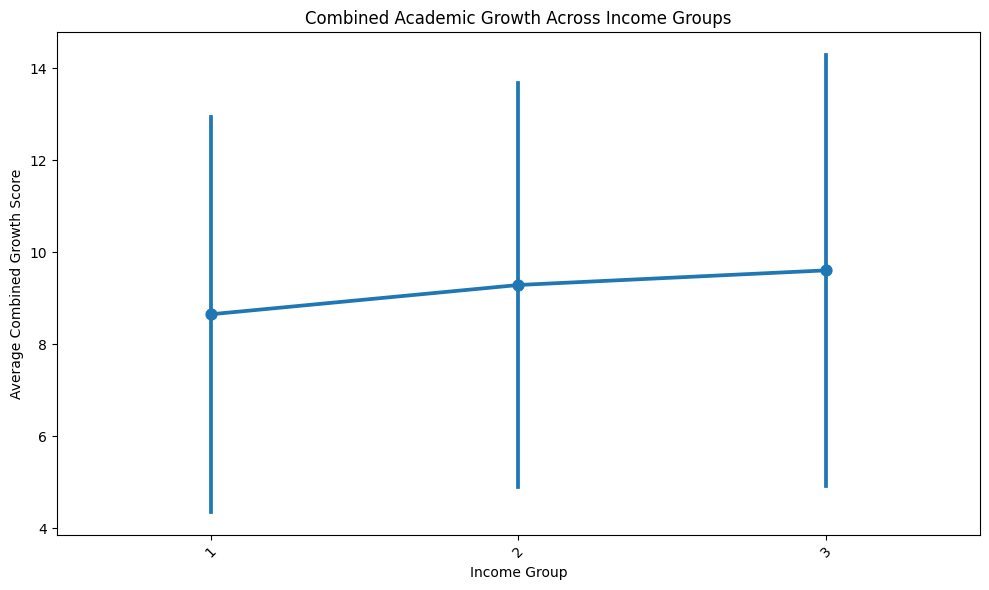

In [ ]:
# line plot for Combined Growth Scores by Income Group
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='incomegroup', y='combined_growth_score', ci='sd', markers='o', linestyles='-', dodge=True)
plt.title('Combined Academic Growth Across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Average Combined Growth Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()